<a href="https://colab.research.google.com/github/RajeswariVelakaturi/CODSOFT/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [3]:
# Load the dataset (replace 'sales_data.csv' with your file path)
file_path = '/content/advertising.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [4]:
# Preprocess the data
# Assuming 'Sales' is the target variable and other columns are features
# Handle missing values if necessary
df = df.dropna()  # Example: dropping rows with missing values

# Encode categorical features if any
# df = pd.get_dummies(df)  # Uncomment if you have categorical features


In [5]:
# Define features and target variable
X = df.drop('Sales', axis=1)  # Features
y = df['Sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [7]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2.9077569102710896
R^2 Score: 0.9059011844150826


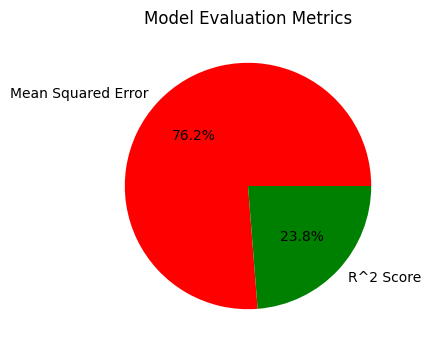

In [10]:
# Create a pie chart
labels = ['Mean Squared Error', 'R^2 Score']
values = [mse, r2]

# Plot the pie chart
plt.figure(figsize=(5, 4))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Model Evaluation Metrics')
plt.show()

In [13]:
# Preprocess the data
df = df.dropna()  # Example: dropping rows with missing values
X = df.drop('Sales', axis=1)  # Features
y = df['Sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [15]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2.9077569102710896
R^2 Score: 0.9059011844150826


In [16]:
# Calculate percentage increase and decrease
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results['Change'] = results['Predicted'] - results['Actual']
results['Percentage Change'] = (results['Change'] / results['Actual']) * 100


In [17]:
# Calculate the percentage of sales increased and decreased
percentage_increased = (results['Percentage Change'] > 0).mean() * 100
percentage_decreased = (results['Percentage Change'] < 0).mean() * 100


In [18]:
# Print the percentages
print(f"Percentage of Sales Increased: {percentage_increased:.2f}%")
print(f"Percentage of Sales Decreased: {percentage_decreased:.2f}%")


Percentage of Sales Increased: 65.00%
Percentage of Sales Decreased: 35.00%


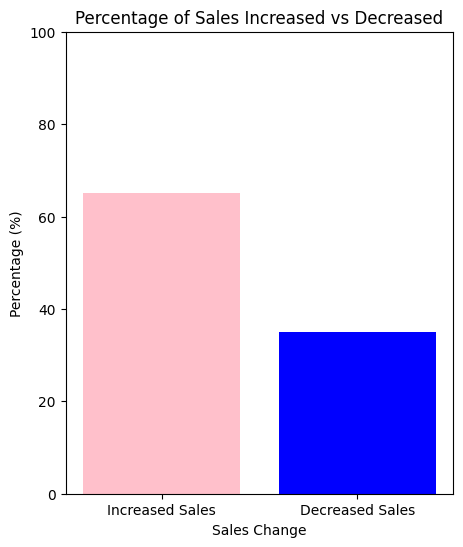

In [20]:
# Plotting the bar graph
plt.figure(figsize=(5, 6))
categories = ['Increased Sales', 'Decreased Sales']
percentages = [percentage_increased, percentage_decreased]

plt.bar(categories, percentages, color=['pink', 'blue'])
plt.xlabel('Sales Change')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Sales Increased vs Decreased')
plt.ylim(0, 100)  # Set y-axis limit for better visualization
plt.show()

In [22]:
# Calculate the total sales for each media type
total_tv_sales = df['TV'].sum()
total_radio_sales = df['Radio'].sum()
total_newspaper_sales = df['Newspaper'].sum()

# Calculate the total sales across all media types
total_sales = total_tv_sales + total_radio_sales + total_newspaper_sales


In [23]:
# Calculate the percentage of total sales for each media type
tv_percentage = (total_tv_sales / total_sales) * 100
radio_percentage = (total_radio_sales / total_sales) * 100
newspaper_percentage = (total_newspaper_sales / total_sales) * 100


In [24]:
# Print the sales percentage for each media type
print(f"\nPercentage of Total Sales by Media Type:")
print(f"TV: {tv_percentage:.2f}%")
print(f"Radio: {radio_percentage:.2f}%")
print(f"Newspaper: {newspaper_percentage:.2f}%")



Percentage of Total Sales by Media Type:
TV: 73.21%
Radio: 11.58%
Newspaper: 15.21%


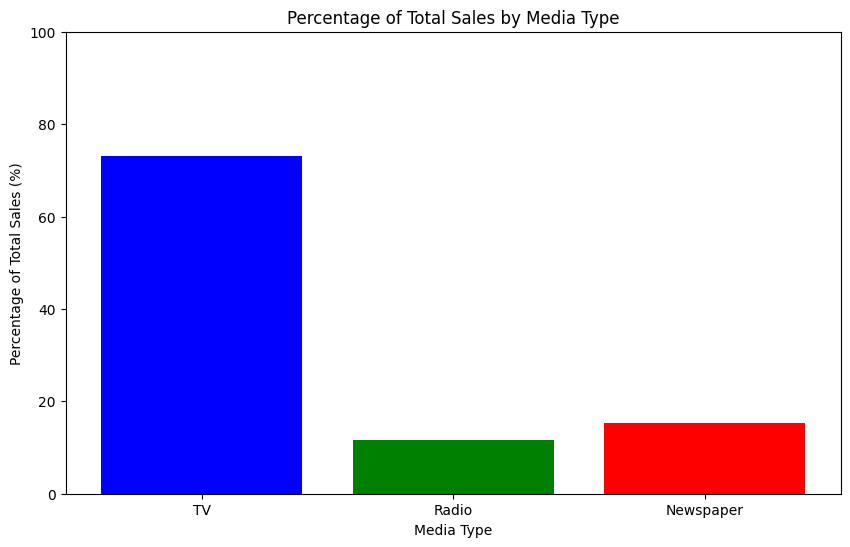

In [25]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
media_types = ['TV', 'Radio', 'Newspaper']
percentages = [tv_percentage, radio_percentage, newspaper_percentage]

plt.bar(media_types, percentages, color=['blue', 'green', 'red'])
plt.xlabel('Media Type')
plt.ylabel('Percentage of Total Sales (%)')
plt.title('Percentage of Total Sales by Media Type')
plt.ylim(0, 100)  # Set y-axis limit for better visualization
plt.show()

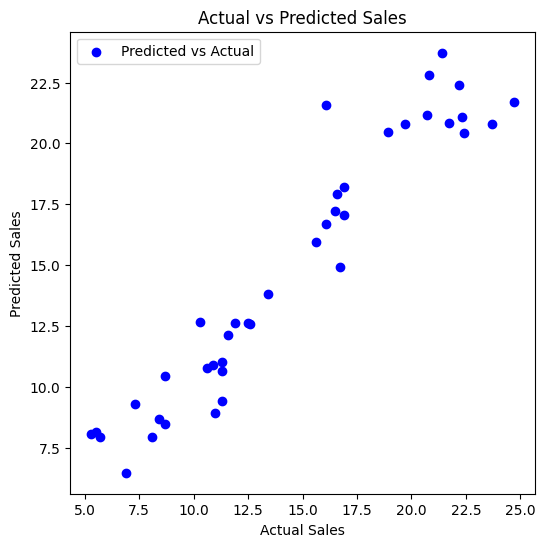

In [8]:
# Plot the actual vs predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()